In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

C:\Users\Rajarshi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
pip install cufflinks


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=becb1d99667fbfd7b7082fc741cdd8be19a408af4a0fe65aa2e3b879889d6399
  Stored in directory: c:\users\rajarshi\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [6]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
from sklearn.model_selection import GridSearchCV # GridSearchCV implements a “fit” and a “score” method.

In [8]:
df = pd.read_csv('telecom_churn.csv')
df.head(5)

#Class - 0 -> customer retained
#Class - 1 -> cusomer has left

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
# Summary of Data Frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [10]:
#Description of the data in the DataFrame
df.describe()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


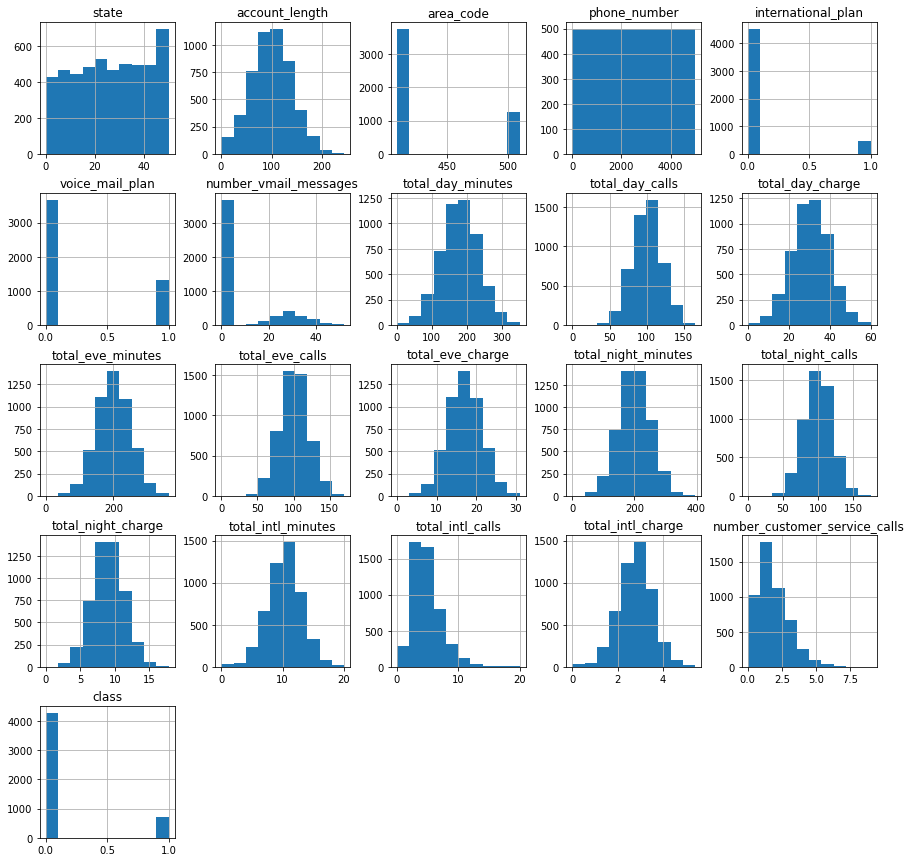

In [43]:
import matplotlib.pyplot as plt
## specify figure size (width, height)
df.hist(figsize=(15,15))
plt.show()

In [13]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


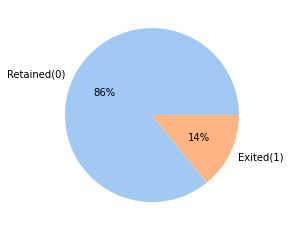

In [15]:
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['class'].value_counts(), labels = ['Retained(0)', 'Exited(1)'], colors = colors, autopct='%.0f%%')
plt.show()

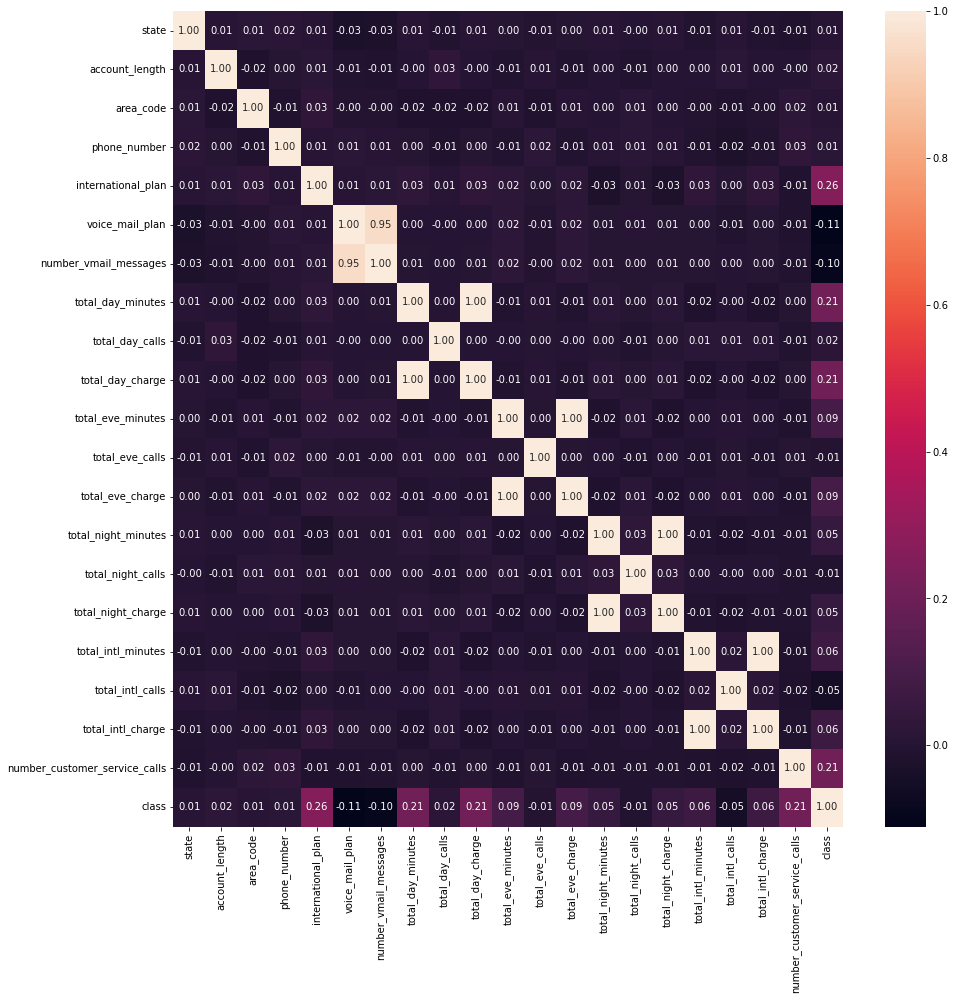

In [16]:
## The resulting correlation matrix shows how each column correlates with every other column in the DataFrame.
##The values in the matrix range from -1 to 1, where:

#1 indicates a perfect positive correlation,
#-1 indicates a perfect negative correlation, and
# 0 indicates no correlation.

corr_matrix = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.show()

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_13116\3303476346.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_13116\3303476346.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is de

Text(0.5, 1.0, 'Distribution of day charges by churn')

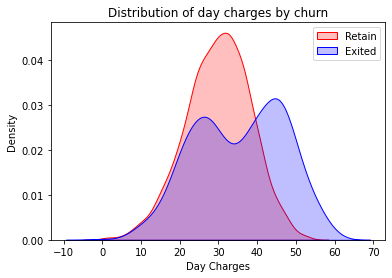

In [17]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],
               color = "Red", shade = True) ## line creates a KDE plot for the "total_day_charge" column where the "class" column equals 0 (indicating one group, perhaps "Retain" or "Not exited"). It's shaded in red.
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],
               color = "Blue", shade = True) ## line adds another KDE plot for the "total_day_charge" column where the "class" column equals 1 (indicating another group, perhaps "Exited"). It's shaded in blue.

ax.legend(["Retain", "Exited"], loc = "upper right") ## adds a legend to the plot indicating which color corresponds to which group.
ax.set_ylabel("Density") ## This sets the label for the y-axis as "Density".
ax.set_xlabel("Day Charges") ## This sets the label for the x-axis as "Day Charges".
ax.set_title("Distribution of day charges by churn") ## This sets the title of the plot as "Distribution of day charges by churn".

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_13116\601002929.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_13116\601002929.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Rajarshi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is depr

Text(0.5, 1.0, 'Distribution of evening charges by churn')

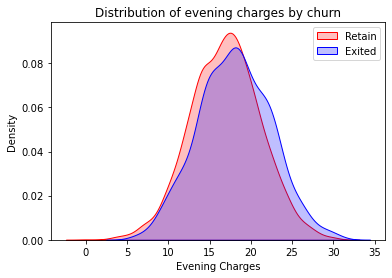

In [18]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Exited"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

Telecom Churn Prediction : Data Preprocessing



In [19]:
## Preparing the data for machine learning modeling by separating the features (X) from the target variable (Y). 

X = df.drop(['class', 'area_code', 'phone_number'], axis='columns')
Y = df['class']


In [20]:
from sklearn.model_selection import train_test_split ##  function is commonly used to split datasets into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) ## Line splits the features (X) and the target variable (Y) into training and testing sets. 

Telecom Churn Prediction : Feature Selection



In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train) ## line trains the random forest classifier model using the training data. The fit method fits the model to the training data by learning patterns and relationships between the features (x_train) and the target variable (y_train). After this step, the RF object contains the trained model ready for predictions.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



RandomForestClassifier()

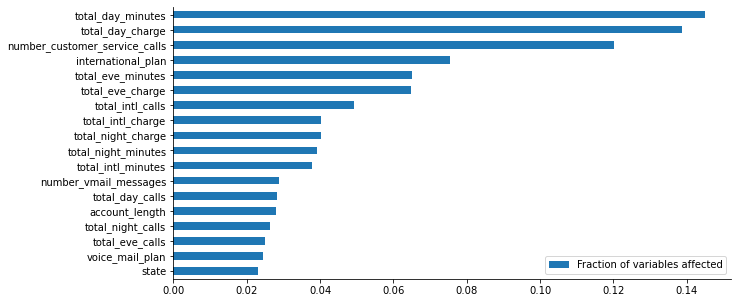

In [22]:
# Plot the feature importance
feature_scores= pd.DataFrame({"Fraction of variables affected" : RF.feature_importances_},index = X.columns)
feature_scores= feature_scores.sort_values(by = "Fraction of variables affected")
feature_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

Telecom Churn Prediction : Model Evaluation

- Logistic Regression



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
LR_Model = LogisticRegression()
LR_Model_CV=GridSearchCV(LR_Model,Grid,cv=10) ## line creates a GridSearchCV object named LR_Model_CV. GridSearchCV is a method for tuning hyperparameters by searching over a specified grid of parameter values. It takes the model (LR_Model), the parameter grid (Grid), and the number of cross-validation folds (cv=10 in this case).

LR_Model_CV.fit(x_train, y_train) ## line fits the GridSearchCV object to the training data. It performs an exhaustive search over the grid of hyperparameters defined in Grid, using cross-validation to evaluate the performance of each combination of hyperparameters.

print("tuned hpyerparameters :(best parameters) ",LR_Model_CV.best_params_)
     

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Va

In [24]:
LR_Model = LogisticRegression(C=0.001, penalty="l2") ## line initializes a logistic regression model with specific hyperparameters. The C parameter controls the strength of regularization (inverse of regularization strength), and the penalty parameter specifies the type of regularization, where "l2" corresponds to Ridge regularization.

LR_Model.fit(x_train, y_train) ## This line fits the logistic regression model to the training data (x_train, y_train). It learns the relationship between the features (x_train) and the target variable (y_train).


y_pred = LR_Model.predict(x_test)
print(classification_report(y_test, y_pred))

## This line prints a classification report, which provides several metrics for evaluating the performance of the classifier on the test set. It includes metrics such as precision, recall, F1-score, and support for each class. The classification_report function compares the actual target values (y_test) with the predicted values (y_pred).

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       862
           1       0.73      0.06      0.11       138

    accuracy                           0.87      1000
   macro avg       0.80      0.53      0.52      1000
weighted avg       0.85      0.87      0.81      1000



C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



<AxesSubplot:>

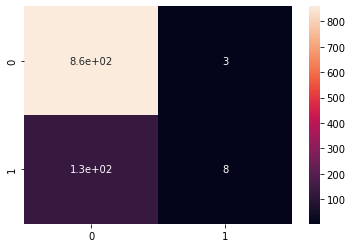

In [25]:
cm = confusion_matrix(y_test, y_pred) ## This line computes the confusion matrix for the classifier's predictions on the test set. The confusion matrix is a table that summarizes the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.

sns.heatmap(cm, annot = True) ## This line creates a heatmap using seaborn (sns) library, visualizing the confusion matrix (cm). The annot=True parameter adds numerical annotations to each cell of the heatmap, displaying the count of predictions in each cell.

Telecom Churn Prediction : Model Evaluation



- Support Vector Machine



In [26]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

SVM_Model = LinearSVC(max_iter = 10000)
SVM_Model = CalibratedClassifierCV()
SVM_Model.fit(x_train, y_train)

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Rajarshi\anaconda3\lib\site-package

CalibratedClassifierCV()

In [27]:
y_pred = SVM_Model.predict(x_test) ## This line uses the trained SVM model (SVM_Model) to predict the target variable (y_pred) for the test data (x_test). It applies the learned model to the test data and produces predicted labels for each instance in x_test.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       862
           1       0.50      0.07      0.12       138

    accuracy                           0.86      1000
   macro avg       0.68      0.53      0.52      1000
weighted avg       0.82      0.86      0.81      1000



C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future v

<AxesSubplot:>

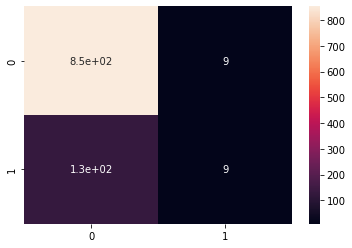

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Telecom Churn Prediction : Model Evaluation

- Random Forest Classifier


In [29]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier()
RF_Model.fit(x_train, y_train)

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



RandomForestClassifier()

In [30]:
y_pred = RF_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       862
           1       0.96      0.78      0.86       138

    accuracy                           0.96      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.96      0.96      0.96      1000



C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



<AxesSubplot:>

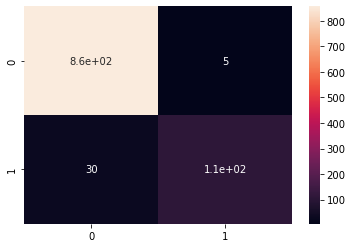

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Telecom Churn Prediction : Model Evaluation

- K-Nearest Neighbour



In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future v

{'n_neighbors': 9}


C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [34]:
KNN_Model = KNeighborsClassifier(n_neighbors=9)
KNN_Model.fit(x_train, y_train)

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



KNeighborsClassifier(n_neighbors=9)

In [35]:
y_pred = KNN_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       862
           1       0.86      0.30      0.45       138

    accuracy                           0.90      1000
   macro avg       0.88      0.65      0.70      1000
weighted avg       0.89      0.90      0.88      1000



C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



<AxesSubplot:>

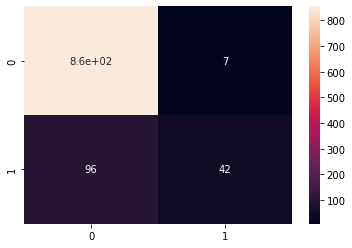

In [36]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Telecom Churn Prediction : Model Evaluation



- Naive Bayes Classifier



In [37]:
from sklearn.naive_bayes import GaussianNB

GNB_Model = GaussianNB()
GNB_Model.fit(x_train, y_train)

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



GaussianNB()

In [38]:
y_pred = GNB_Model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       862
           1       0.56      0.55      0.56       138

    accuracy                           0.88      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.88      0.88      0.88      1000



C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



<AxesSubplot:>

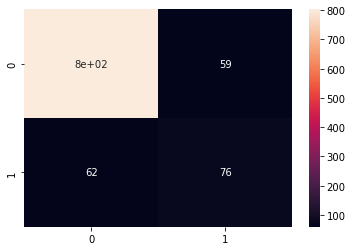

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

Comparing Models

In [40]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, LR_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, SVM_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, RF_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, KNN_Model.predict_proba(x_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, GNB_Model.predict_proba(x_test)[:, 1], pos_label = 1)

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future v

In [41]:
# AUC score
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, LR_Model.predict_proba(x_test)[:, 1])
auc_score2 = roc_auc_score(y_test, SVM_Model.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, RF_Model.predict_proba(x_test)[:, 1])
auc_score4 = roc_auc_score(y_test, KNN_Model.predict_proba(x_test)[:, 1])
auc_score5 = roc_auc_score(y_test, GNB_Model.predict_proba(x_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes


Logistic Regression:  0.6805877803557618
Support Vector Machine:  0.7119943508524159
Random Forest:  0.9080668482464104
K-Nearest Neighbors:  0.7066268200006726
Naive Bayes:  0.8394868690944551


C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Rajarshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning:

is_sparse is deprecated and will be removed in a future v

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
Random Forest:  0.9080668482464104 is a better model for prediction.

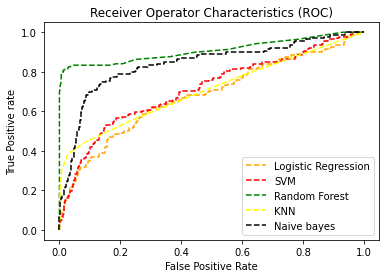

In [42]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()